In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [2]:
filename="change.tif"
filename1="im1.tif"
filename2="im2.tif"
imgch=Image.open(filename)
im1=Image.open(filename1)
im2=Image.open(filename2)

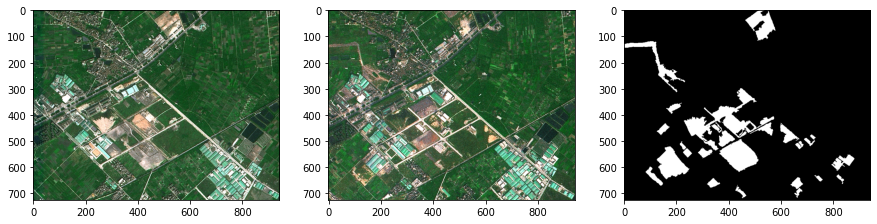

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im1)
plt.subplot(1,3,2)
plt.imshow(im2)
plt.subplot(1,3,3)
plt.imshow(imgch)

In [8]:
imgch=np.array(imgch)
im1=np.array(im1,dtype=np.int16)
im2=np.array(im2,dtype=np.int16)

In [6]:
im1.shape,im2.shape,imgch.shape

((725, 941, 3), (725, 941, 3), (725, 941, 3))

In [7]:
im1.max(),im1.min(),im1.mean(),im2.max(),im2.min(),im2.mean()

(255, 0, 80.82929483186143, 255, 0, 82.47122772301415)

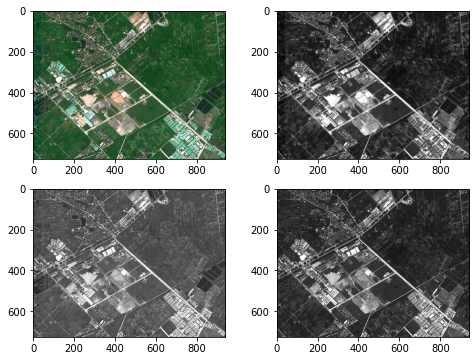

In [9]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.imshow(im1)
plt.subplot(2,2,2)
plt.imshow(im1[:,:,0],cmap="gray")
plt.subplot(2,2,3)
plt.imshow(im1[:,:,1],cmap="gray")
plt.subplot(2,2,4)
plt.imshow(im1[:,:,2],cmap="gray")
plt.show()

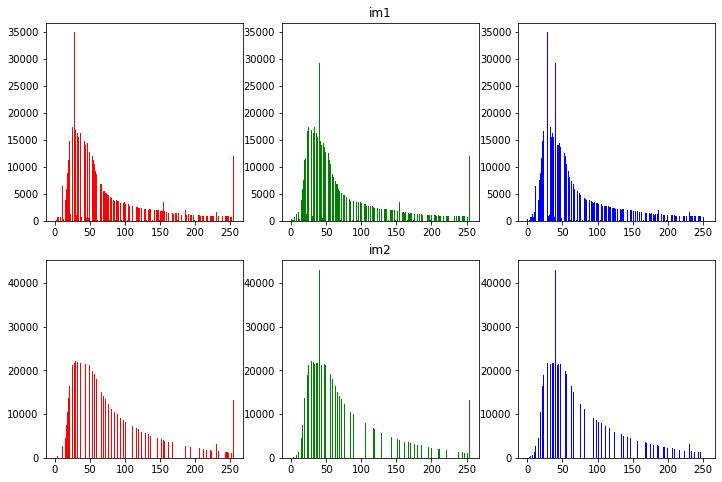

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.hist(im1[:,:,0].flatten(),bins=256,color="r")
plt.subplot(2,3,2)
plt.hist(im1[:,:,0].flatten(),bins=256,color="g")
plt.title("im1")
plt.subplot(2,3,3)
plt.hist(im1[:,:,0].flatten(),bins=256,color="b")
plt.subplot(2,3,4)
plt.hist(im2[:,:,0].flatten(),bins=256,color="r")
plt.subplot(2,3,5)
plt.title("im2")
plt.hist(im2[:,:,0].flatten(),bins=256,color="g")
plt.subplot(2,3,6)
plt.hist(im2[:,:,0].flatten(),bins=256,color="b")
plt.show()

In [11]:
im1

array([[[ 11,  75,  43],
        [ 23,  75,  43],
        [ 18,  66,  35],
        ...,
        [142, 155, 120],
        [131, 156, 121],
        [ 95, 119,  86]],

       [[ 28,  91,  46],
        [ 19,  89,  43],
        [ 18,  80,  42],
        ...,
        [126, 147, 109],
        [124, 150, 114],
        [124, 146, 114]],

       [[ 19,  95,  53],
        [ 19,  95,  53],
        [ 19,  89,  46],
        ...,
        [106, 108,  80],
        [106, 119,  91],
        [110, 124,  96]],

       ...,

       [[ 21,  76,  46],
        [ 17,  73,  43],
        [ 11,  73,  44],
        ...,
        [ 34,  57,  46],
        [ 33,  51,  44],
        [ 40,  58,  53]],

       [[ 16,  69,  42],
        [ 17,  76,  44],
        [ 17,  80,  44],
        ...,
        [ 34,  57,  43],
        [ 32,  49,  41],
        [ 32,  51,  43]],

       [[ 17,  61,  35],
        [ 19,  80,  46],
        [ 19,  80,  46],
        ...,
        [ 34,  66,  49],
        [ 32,  57,  43],
        [ 32,  57,  43]]

In [12]:
im2

array([[[ 37,  92,  61],
        [  0,  70,  25],
        [  0,  30,   0],
        ...,
        [ 21,  88,  28],
        [ 29,  80,  32],
        [ 43, 146,  56]],

       [[ 37, 109,  56],
        [ 37,  92,  56],
        [ 28,  88,  43],
        ...,
        [ 29,  88,  32],
        [ 29,  96,  32],
        [ 28,  96,  32]],

       [[ 19,  57,  25],
        [ 28,  88,  37],
        [ 33,  92,  47],
        ...,
        [ 32,  96,  40],
        [ 32,  96,  37],
        [ 25,  96,  37]],

       ...,

       [[ 47, 126, 116],
        [ 36,  76,  47],
        [ 40,  80,  50],
        ...,
        [ 29,  44,  50],
        [ 25,  44,  47],
        [ 25,  42,  47]],

       [[ 72, 139,  87],
        [ 47,  96,  61],
        [ 40,  80,  50],
        ...,
        [ 29,  42,  43],
        [ 25,  33,  43],
        [ 29,  42,  47]],

       [[ 49, 109,  69],
        [ 49, 101,  69],
        [ 49,  81,  56],
        ...,
        [ 25,  44,  43],
        [ 25,  44,  40],
        [ 25,  44,  43]]

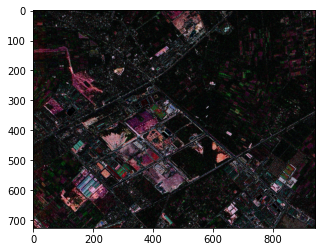

In [13]:
imchange=np.abs(im1-im2)
plt.imshow(imchange)
plt.show()

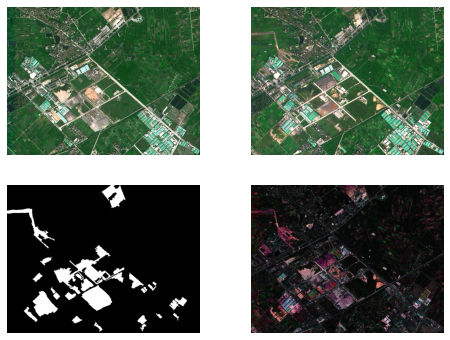

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(im1)
plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(im2)
plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(imgch)
plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(imchange)
plt.show()

In [15]:
rows,cols=imchange.shape[0:2]
X=imchange.reshape(-1,3)
X[0:5]

array([[26, 17, 18],
       [23,  5, 18],
       [18, 36, 35],
       [ 2,  8,  8],
       [12, 26, 21]], dtype=int16)

In [16]:
from sklearn.cluster import KMeans
kmc=KMeans(n_clusters=2,random_state=0)
kmc.fit(X)
y_pred=kmc.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
kmc.cluster_centers_

array([[ 17.73839969,  16.35622166,  16.10399836],
       [109.24589494,  89.40135473,  99.99590113]])

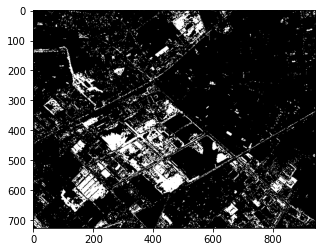

In [21]:
if kmc.cluster_centers_[0].sum()>kmc.cluster_centers_[1].sum():
    y_pred[y_pred==0]=2
    y_pred[y_pred==1]=0
    y_pred[y_pred==2]=1
imresult=y_pred.reshape(rows,cols)
plt.imshow(imresult,cmap="gray")

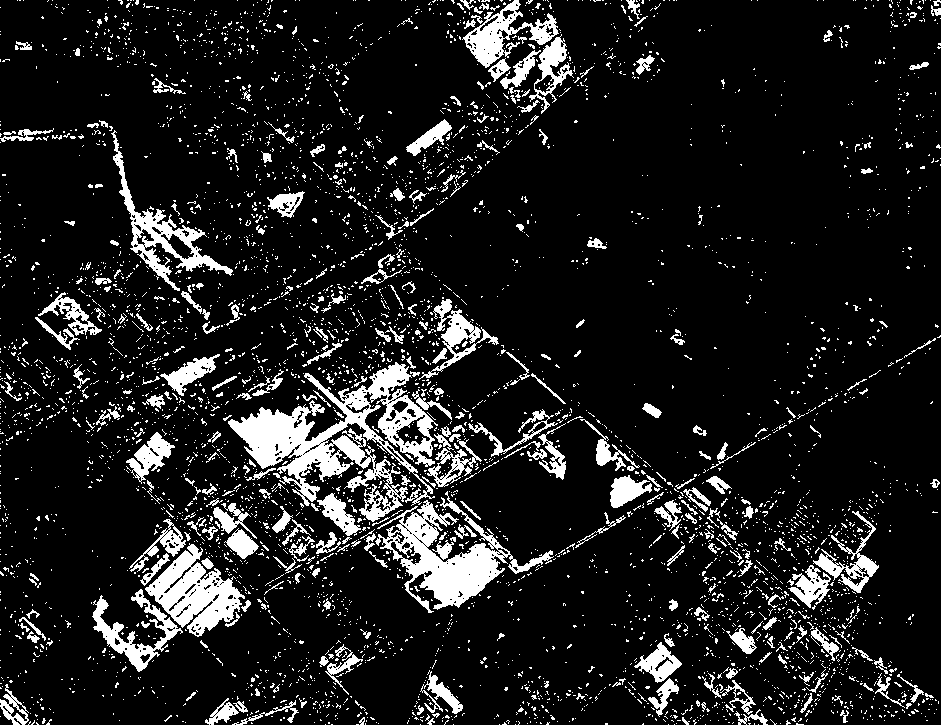

In [29]:
result=y_pred.reshape(rows,cols)
result=np.array(result,dtype=np.uint8)
result[result==1]=255
imgresult=Image.fromarray(result)
imgresult.save("C:/Users/CCEC/Desktop/变化检测结果.jpg")
imgresult

In [30]:
y_true=imgch[:,:,0].flatten()
y_true[y_true==255]=1
y_true[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_true,y_pred).round(4)*100

91.06

In [32]:
confusion_matrix(y_true,y_pred)

array([[576546,  36170],
       [ 24816,  44693]], dtype=int64)

In [33]:
from sklearn.metrics import recall_score, precision_score
precision_score(y_true,y_pred).round(4)*100, recall_score(y_true, y_pred).round(4)*100

(55.269999999999996, 64.3)

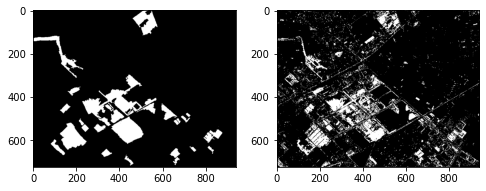

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow (imgch)
plt.subplot(1,2,2)
plt.imshow (imresult,cmap='gray')

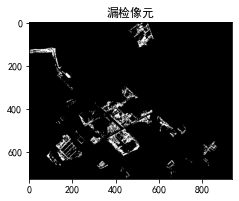

In [40]:
cuojian,loujian=np.zeros((rows,cols)),np.zeros((rows,cols))
cuojian[ (imgch[:, :,0]==0) & (imresult==1) ]=255
loujian[ (imgch[:, :,0]==255) & (imresult==0) ]=255
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title("虚警像元")
plt.imshow (cuojian,cmap='gray' )
plt.title("漏检像元")
plt.imshow(loujian,cmap='gray' )

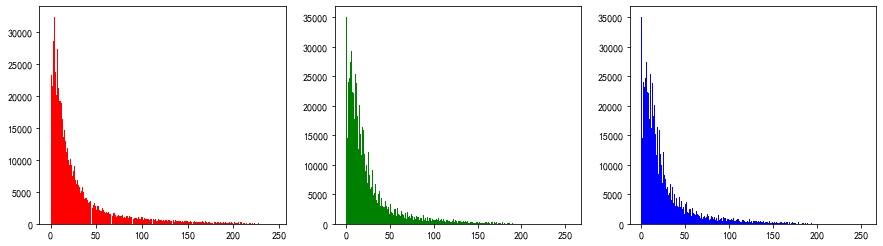

In [43]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(X[:,0].flatten(),bins=256,color="r")
plt.subplot(1,3,2)
plt.hist(X[:,1].flatten(),bins=256,color="g")
plt.subplot(1,3,3)
plt.hist(X[:,1].flatten(),bins=256,color="b")
plt.show()

In [45]:
resultbetter=result.copy()
kersize=3
size=kersize//2
for i in range(size,rows-size):
    for j in range(size,cols-size):
        resultbetter[i,j]=np.median(result[i-size:i+size+1,j-size:j+size+1])

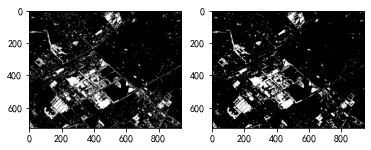

In [47]:
plt.subplot(1,2,1)
plt.imshow(imresult,cmap='gray' )
plt.subplot(1,2,2)
plt.imshow(resultbetter,cmap='gray')
plt.show()

In [49]:
y_better=resultbetter.flatten()
y_better[y_better==255]=1
print("kersize=3时优化结果为: ")
print("准确率%.2f"%(accuracy_score(y_true,y_better)*100))
print("精确率%.2f"%(precision_score(y_true,y_better)*100))
print("召回率%.2f"%(recall_score(y_true,y_better)*100))

kersize=3时优化结果为: 
准确率92.77
精确率64.57
召回率64.32


In [50]:
print(classification_report(y_true,y_better))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    612716
           1       0.65      0.64      0.64     69509

    accuracy                           0.93    682225
   macro avg       0.80      0.80      0.80    682225
weighted avg       0.93      0.93      0.93    682225



In [51]:
resultbetter=result.copy()
kersize=5
size=kersize//2
for i in range(size,rows-size):
    for j in range(size,cols-size):
        resultbetter[i,j]=np.median(result[i-size:i+size+1, j-size:j+size+1])
y_better=resultbetter.flatten()
y_better[y_better==255]=1
print("kersize=5时优化结果为: ")
print("准确率%.2f"%(accuracy_score(y_true,y_better)*100))
print("精确率%.2f"%(precision_score(y_true,y_better)*100))
print("召回率%.2f"%(recall_score(y_true,y_better)*100))

kersize=5时优化结果为: 
准确率93.82
精确率72.31
召回率63.82


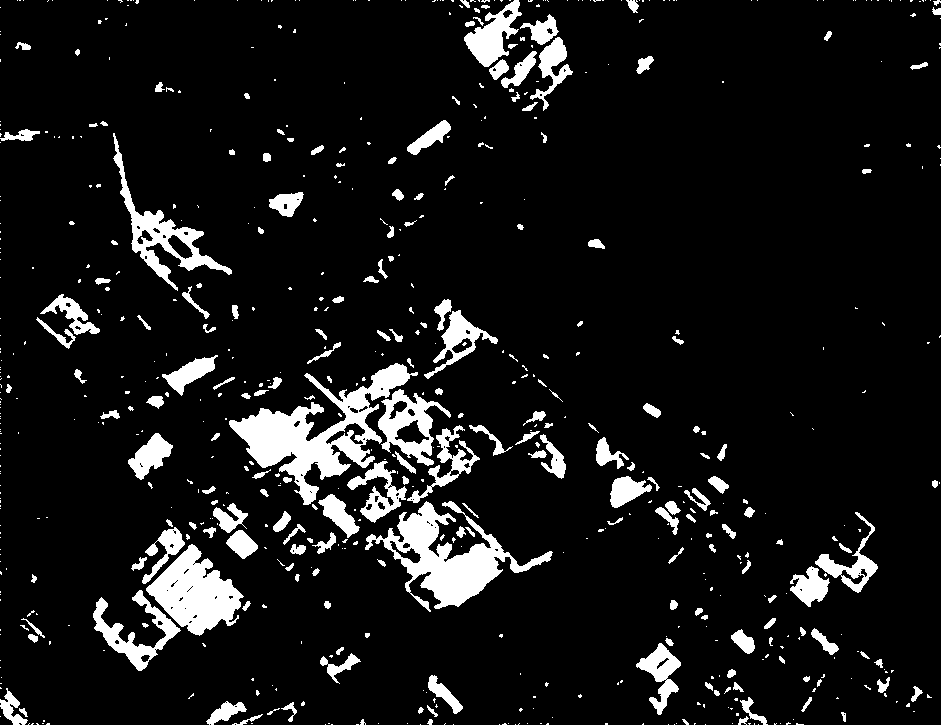

In [52]:
imgresult=Image.fromarray(resultbetter)
imgresult.save("C:/Users/CCEC/Desktop/变化检测优化结果.jpg")
imgresult